In [2]:
# start. importing all necessary modules

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re, string

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

In [163]:
# adding the training urls

train_url = 'https://drive.google.com/file/d/1wOhuYkxC9RQHs6LH-OtBHNVlQv3w-kZJ/view?usp=sharing'
train_url_ = 'https://drive.google.com/uc?id=' + train_url.split('/')[-2]

In [253]:
# adding the testing urls
test_url = 'https://drive.google.com/file/d/17XEmkKYr3mxMWLLhY8AzAzFLCs2CT5RG/view?usp=sharing'
test_url_ = 'https://drive.google.com/uc?id=' + test_url.split('/')[-2]

In [254]:
print('my training link:', train_url_)
print('my testing link:', test_url_)

my training link: https://drive.google.com/uc?id=1wOhuYkxC9RQHs6LH-OtBHNVlQv3w-kZJ
my testing link: https://drive.google.com/uc?id=17XEmkKYr3mxMWLLhY8AzAzFLCs2CT5RG


In [255]:
# reading the given files and convrting it to the dataframes

df_train = pd.read_csv(train_url_, header= None) # got the dataframe
df_test = pd.read_csv(test_url_, header= None)


In [256]:
# print('training file:\n', df_train.head(n = len(df_train))) # to be sure and see the structure

print(type(df_train), type(df_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [257]:
train_data_set = list(df_train[1])
test_data_set = list(df_test[1])


# print(train_data_set) # all data from the column in list

In [258]:
# list --> string (main data)

train_in_string = ''
for i in train_data_set:
    train_in_string += (' ' + i)
    
test_in_string = ''
for j in test_data_set:
    test_in_string += (' ' + j)
    
# print(train_in_string) 

In [259]:
# adding default english stopwords

stop_words = stopwords.words('english')

In [260]:
# preprocessing the data 

def cleaning(label):

    filtered = re.sub(r'[^\w\s]', '', label)
    filtered = re.sub("@\S+", "", filtered)
    filtered = re.sub("https*\S+", "", filtered)
    filtered = re.sub("\d", "", filtered)
    filtered = re.sub("#\S+", "", filtered)

    filtered = filtered.lower()
    tokens = word_tokenize(filtered)

    filtered_tokens = []
    for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(word)

    lemmatizer = WordNetLemmatizer()
    
    # stemmer = PorterStemmer()
    # stemmed_tokens = [stemmer.stem(s) for s in filtered_tokens_set]

    lemmatized = [lemmatizer.lemmatize(l) for l in filtered_tokens]
    lemmatizer = set(lemmatized)
    return lemmatizer 


In [261]:
train_cleaned_data = cleaning(train_in_string)
test_cleaned_data = cleaning(test_in_string)
# print(train_cleaned_data)
print(test_cleaned_data)


{'kew', 'dyatel', 'baxter', 'pera', 'portmone', 'far', 'frame', 'tgnmdoek', 'kit', 'kjkljkn', 'bavpp', 'lgarfield', 'bear', 'dodik', 'pair', 'bazrer', 'buk', 'vzaert', 'kwffvav', 'tsem', 'downytunv', 'part', 'lox', 'nya', 'clown', 'sert'}


In [262]:
# getting started with labels

train_label = []
test_label = []

for label in list(df_train[0]):
    if label == '__label__0':
        train_label.append(0)
    if label == '__label__1':
        train_label.append(1)

for label_test in list(df_test[0]):
    if label_test == '__label__0':
        test_label.append(0)
    if label_test == '__label__1':
        test_label.append(1)

print(type(train_label), train_label)
print(type(test_label), test_label)


<class 'list'> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
<class 'list'> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [263]:
# list --> nparray (labels)

y_train = np.asarray(train_label).astype("float32")
y_test = np.asarray(test_label).astype("float32")


print(type(y_train), y_train, y_train.shape)
print(type(y_test), y_test)

<class 'numpy.ndarray'> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] (26,)
<class 'numpy.ndarray'> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [264]:
# vectorizing data with sklearn

def vectorize(ten):
    vectorizer = CountVectorizer()
    sparse_matrix = vectorizer.fit_transform(ten)
    vectorizer.get_feature_names_out()
    
    return sparse_matrix.toarray()
    
train_vect = vectorize(train_cleaned_data) 
test_vect = vectorize(test_cleaned_data) 
print(type(train_vect), '\n', train_vect)

<class 'numpy.ndarray'> 
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

In [265]:
def embadding(sequences, dimension=26):
  
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [266]:
x_train = embadding(train_vect)
x_test = embadding(test_vect)

print(type(x_train), x_train)


#print(len(x_train))

<class 'numpy.ndarray'> [[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [267]:
import tensorflow as tf
from tensorflow.keras import layers

In [268]:
# #creating a model with an activation function - relu
# the_first_model = tf.keras.Sequential(name = 'model')# sequential() allows you to create models layer-by-layer 
 
# the_first_model.add(layers.Dense(5, activation='relu', name = 'layer1'))

# """The function returns 0 if it receives any negative input,
# but for any positive value x it returns that value back"""

# the_first_model.add(layers.Dense(1, activation='sigmoid', name = 'layer3'))

# print(the_first_model)

In [269]:
# the_first_model.build(input_shape=(None, 3))
# the_first_model.summary()

# tf.config.run_functions_eagerly(True)

In [293]:
the_first_model = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),   layers.Dense(64, activation="relu"),   layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [294]:
the_first_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"], run_eagerly=True)


print(type(x_train), len(x_train))
print(type(y_train), len(y_train))

tf.config.run_functions_eagerly(True)

<class 'numpy.ndarray'> 26
<class 'numpy.ndarray'> 26


In [300]:
history = the_first_model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=8,
                    validation_split=0.1, shuffle = True,
                    verbose = 2)


Epoch 1/50
3/3 - 0s - loss: 0.7023 - accuracy: 0.5652 - val_loss: 1.0058 - val_accuracy: 0.0000e+00 - 80ms/epoch - 27ms/step
Epoch 2/50
3/3 - 0s - loss: 0.6943 - accuracy: 0.5652 - val_loss: 0.9687 - val_accuracy: 0.0000e+00 - 57ms/epoch - 19ms/step
Epoch 3/50
3/3 - 0s - loss: 0.6906 - accuracy: 0.5652 - val_loss: 0.9421 - val_accuracy: 0.0000e+00 - 58ms/epoch - 19ms/step
Epoch 4/50
3/3 - 0s - loss: 0.6916 - accuracy: 0.5652 - val_loss: 0.9235 - val_accuracy: 0.0000e+00 - 57ms/epoch - 19ms/step
Epoch 5/50
3/3 - 0s - loss: 0.6882 - accuracy: 0.5652 - val_loss: 0.9005 - val_accuracy: 0.0000e+00 - 58ms/epoch - 19ms/step
Epoch 6/50
3/3 - 0s - loss: 0.6884 - accuracy: 0.5652 - val_loss: 0.8809 - val_accuracy: 0.0000e+00 - 60ms/epoch - 20ms/step
Epoch 7/50
3/3 - 0s - loss: 0.6960 - accuracy: 0.5652 - val_loss: 0.8644 - val_accuracy: 0.0000e+00 - 61ms/epoch - 20ms/step
Epoch 8/50
3/3 - 0s - loss: 0.6881 - accuracy: 0.5652 - val_loss: 0.8546 - val_accuracy: 0.0000e+00 - 59ms/epoch - 20ms/step


In [301]:

print(the_first_model.summary())


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                864       
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 7,201
Trainable params: 7,201
Non-trainable params: 0
_________________________________________________________________
None


In [302]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

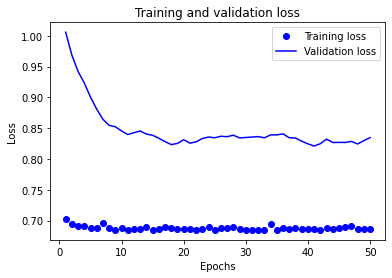

In [303]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [304]:

score = the_first_model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.7019392848014832
Test accuracy: 0.5
